In [1]:
import pandas as pd #the csv reading library
import matplotlib.pyplot as plt #the ploting library
import glob #to get file names
import numpy as np
from pandas import Series
import seaborn as sns
from matplotlib.pyplot import figure
import cmocean.cm as cmo
import seaborn as sns

In [27]:
df = pd.read_csv('../Dissertation_projects/Absorption_experiments/Data/Data_output_method_test.csv', sep=',', index_col=0)
df['wl'] = df.index.astype(float)
df = df.drop('Salt_rep_2', axis=1)


df_meta = pd.read_csv('../Dissertation_projects/Absorption_experiments/Data/Data_output_Meta_2.csv', sep=',', index_col=0)


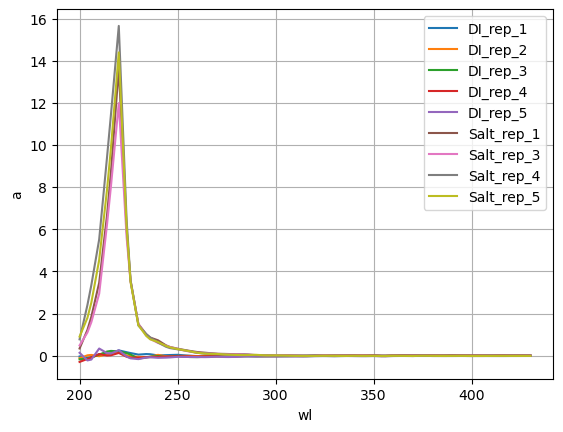

In [28]:
# Plotting each column against 'wl'
for column in df.columns:
    if column != 'wl':  # Skip 'wl' column
        plt.plot(df['wl'], df[column], label=column)

plt.xlabel('wl')
plt.ylabel('a')
plt.title('')
plt.legend()
plt.grid(True)
plt.show()

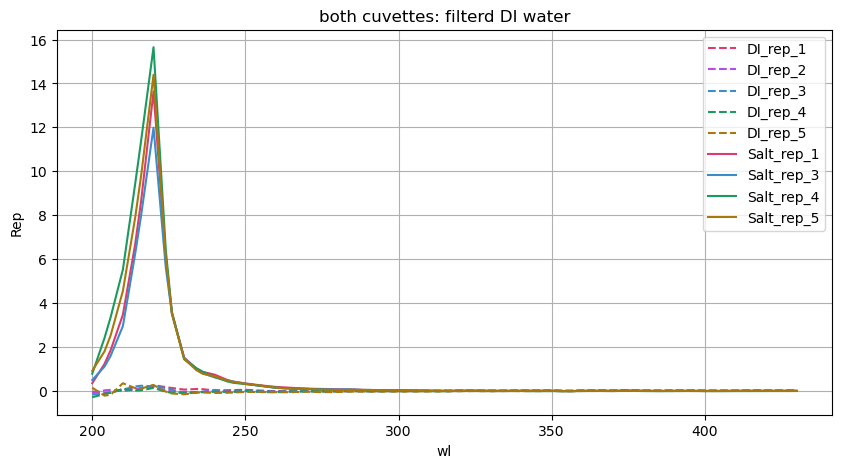

In [29]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
for column in df.columns:
    if column != 'wl':
        color = df_meta.loc[column, 'Rep'].astype(float)  # Get color from metadata
        color_normalized = (color - 0) / (5 - 0)  # Normalize color to range [0, 1]
        color_mapped = cmo.phase(color_normalized)  # Map normalized color to colormap
        Group = df_meta.loc[column, 'Group']
        if Group == 'DI':
            linestyle='dashed'
        else:
            linestyle='solid'
        axes.plot(df['wl'], df[column], label=column, color=color_mapped, linestyle=linestyle)
    else: 
        print("")
    

plt.xlabel('wl')
plt.ylabel('Rep')
plt.title('both cuvettes: filterd DI water')



plt.legend()
plt.grid(True)

plt.savefig("../Dissertation_projects/Absorption_experiments/Figs/test_NaCl_cuv.png")

plt.show()


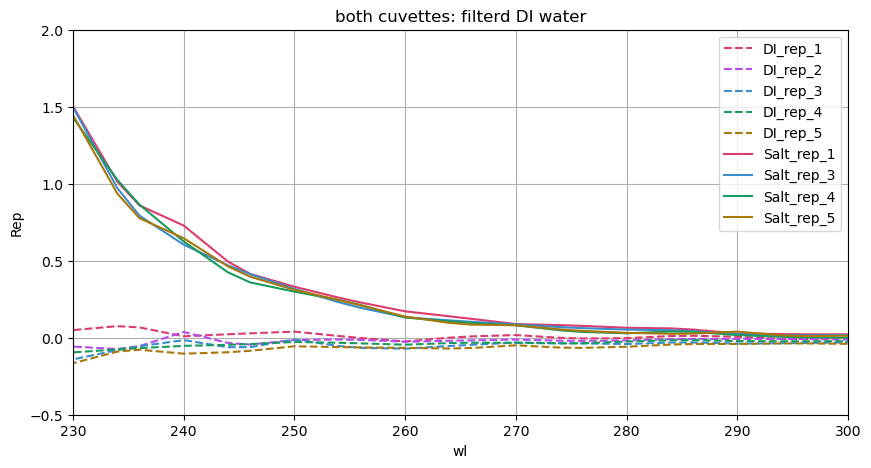

In [31]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
for column in df.columns:
    if column != 'wl':
        color = df_meta.loc[column, 'Rep'].astype(float)  # Get color from metadata
        color_normalized = (color - 0) / (5 - 0)  # Normalize color to range [0, 1]
        color_mapped = cmo.phase(color_normalized)  # Map normalized color to colormap
        Group = df_meta.loc[column, 'Group']
        if Group == 'DI':
            linestyle='dashed'
        else:
            linestyle='solid'
        axes.plot(df['wl'], df[column], label=column, color=color_mapped, linestyle=linestyle)
        axes.set_ylim(-.5,2)
        axes.set_xlim(230, 300)
    else: 
        print("")
    

plt.xlabel('wl')
plt.ylabel('Rep')
plt.title('both cuvettes: filterd DI water')



plt.legend()
plt.grid(True)

plt.savefig("../Dissertation_projects/Absorption_experiments/Figs/test_NaCl_cuv_2.png")

plt.show()

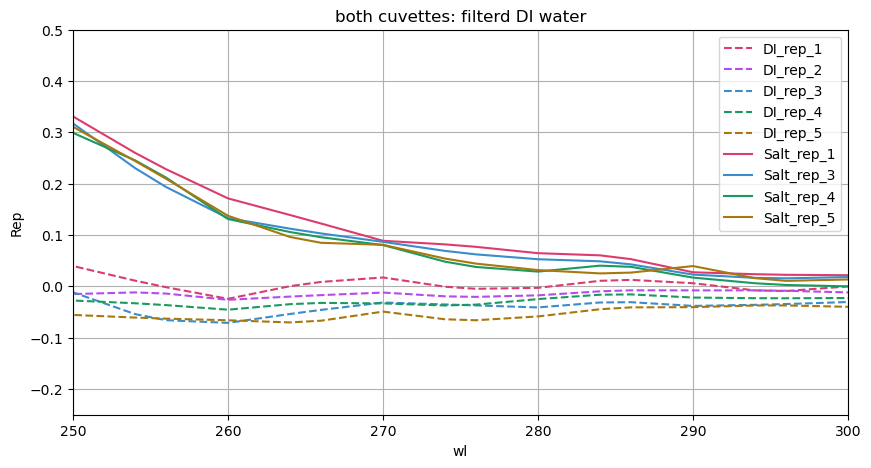

In [32]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
for column in df.columns:
    if column != 'wl':
        color = df_meta.loc[column, 'Rep'].astype(float)  # Get color from metadata
        color_normalized = (color - 0) / (5 - 0)  # Normalize color to range [0, 1]
        color_mapped = cmo.phase(color_normalized)  # Map normalized color to colormap
        Group = df_meta.loc[column, 'Group']
        if Group == 'DI':
            linestyle='dashed'
        else:
            linestyle='solid'
        axes.plot(df['wl'], df[column], label=column, color=color_mapped, linestyle=linestyle)
        axes.set_ylim(-.25,.5)
        axes.set_xlim(250, 300)
    else: 
        print("")
    

plt.xlabel('wl')
plt.ylabel('Rep')
plt.title('both cuvettes: filterd DI water')



plt.legend()
plt.grid(True)

plt.savefig("../Dissertation_projects/Absorption_experiments/Figs/test_NaCl_cuv_3.png")

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


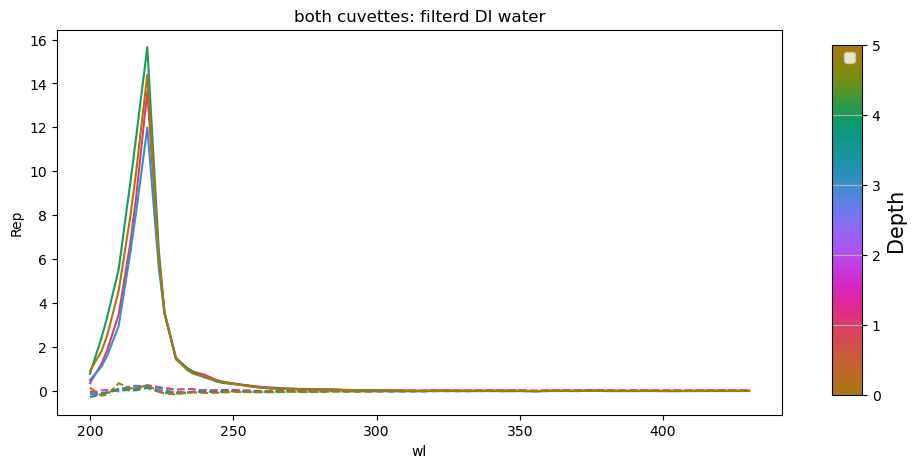

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
for column in df.columns:
    if column != 'wl':
        color = df_meta.loc[column, 'Rep'].astype(float)  # Get color from metadata
        color_normalized = (color - 0) / (5 - 0)  # Normalize color to range [0, 1]
        color_mapped = cmo.phase(color_normalized)  # Map normalized color to colormap
        Group = df_meta.loc[column, 'Group']
        if Group == 'DI':
            linestyle='dashed'
        else:
            linestyle='solid'
        axes.plot(df['wl'], df[column], label=column, color=color_mapped, linestyle=linestyle)
    else: 
        print("")
    

plt.xlabel('wl')
plt.ylabel('Rep')
plt.title('both cuvettes: filterd DI water')

# Add a color bar for the depth on the right side of the figure
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.9, 0.15, 0.03, 0.7])
cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=cmo.phase, norm=plt.Normalize(vmin=0, vmax=5)), cax=cbar_ax)
cbar.ax.set_ylabel('Depth', size=15)

plt.legend()
plt.grid(True)

plt.savefig("../Dissertation_projects/Absorption_experiments/Figs/test_cuv.png")

plt.show()

In [18]:
df2 = df

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


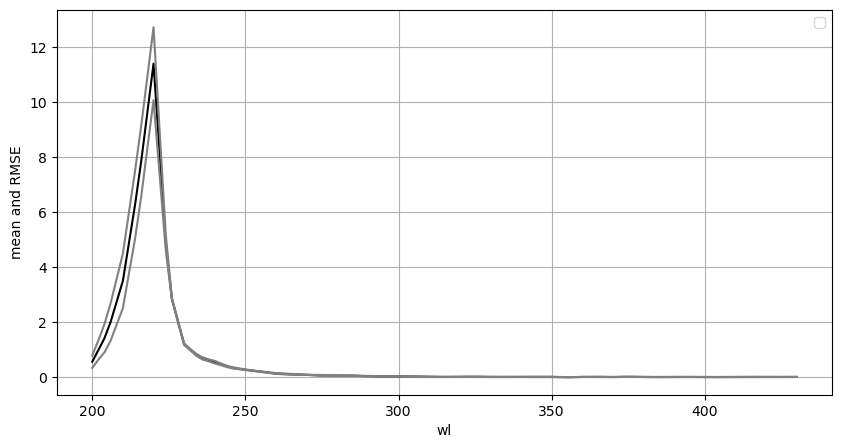

In [19]:
df2 = df
df_Q = df2.drop(['DI_rep_1', 'DI_rep_2', 'DI_rep_3', 'DI_rep_4', 'DI_rep_5', 'wl'], axis=1)


df_Q['rmse'] = np.sqrt(((df_Q.sub(df_Q.mean(axis=1), axis=0)) ** 2).mean(axis=1))
df_Q['mean'] = df_Q.mean(axis=1)
df_Q['mean_up'] = df_Q['mean'] + df_Q['rmse']
df_Q['mean_down'] = df_Q['mean'] - df_Q['rmse']
df_Q['wl'] = df_Q.index.astype(float) 
 
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
axes.plot(df_Q['wl'], df_Q['mean'], color = 'black')
axes.plot(df_Q['wl'], df_Q['mean_up'], color = 'grey')
axes.plot(df_Q['wl'], df_Q['mean_down'],  color = 'grey')
        
plt.xlabel('wl')
plt.ylabel('mean and RMSE')
plt.title('')
plt.legend()
plt.grid(True)

plt.savefig("../Dissertation_projects/Absorption_experiments/Figs/RMSE_DI_repeat.png")


plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


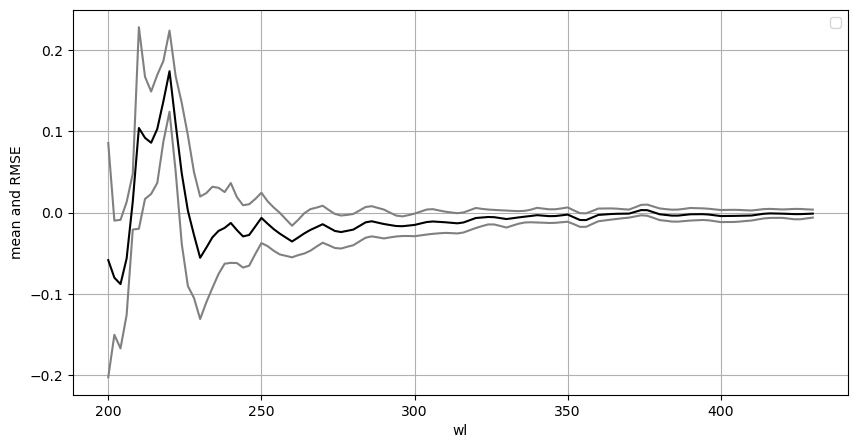

In [20]:
df2 = df
df_Q = df2.drop(['Salt_rep_1', 'Salt_rep_3', 'Salt_rep_4', 'Salt_rep_5', 'wl'], axis=1)


df_Q['rmse'] = np.sqrt(((df_Q.sub(df_Q.mean(axis=1), axis=0)) ** 2).mean(axis=1))
df_Q['mean'] = df_Q.mean(axis=1)
df_Q['mean_up'] = df_Q['mean'] + df_Q['rmse']
df_Q['mean_down'] = df_Q['mean'] - df_Q['rmse']
df_Q['wl'] = df_Q.index.astype(float) 
 
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
axes.plot(df_Q['wl'], df_Q['mean'], color = 'black')
axes.plot(df_Q['wl'], df_Q['mean_up'], color = 'grey')
axes.plot(df_Q['wl'], df_Q['mean_down'],  color = 'grey')
        
plt.xlabel('wl')
plt.ylabel('mean and RMSE')
plt.title('')
plt.legend()
plt.grid(True)

plt.savefig("../Dissertation_projects/Absorption_experiments/Figs/RMSE_100_ppt_nacl.png")


plt.show()

In [21]:


df_c = pd.read_csv('../Dissertation_projects/Absorption_experiments/Data/Data_output_repeat_sample.csv', sep=',', index_col=0)
# Calculate RMSE and mean for each row
df['rmse'] = np.sqrt(((df.sub(df.mean(axis=1), axis=0)) ** 2).mean(axis=1))
df['mean'] = df.mean(axis=1)
df['mean_up'] = df['mean'] + df['rmse']
df['mean_down'] = df['mean'] - df['rmse']

df['wl'] = df.index.astype(float)
df_r = df

df_c

,DI_00ppth_blank_a,DI_00ppth_blank_b,DI_00ppth_blank_c,per_29_NaCl_a,per_29_NaCl_b,per_29_NaCl_c,per_44_NaCl_a,per_44_NaCl_b,per_44_NaCl_c,per_66_NaCl_a,per_66_NaCl_b,per_66_NaCl_c,NaCl_86435g_a,NaCl_86435g_b,NaCl_86435g_c,DI_00ppth_blank_d
NaN_wl,,,,,,,,,,,,,,,,
200,-0.159828,-0.176755,0.091590,0.082965,0.193670,0.285928,0.146805,0.251361,0.217231,0.053851,0.241316,0.207415,0.316133,0.304756,0.281104,-0.021441
202,-0.123339,-0.106578,0.014818,0.358505,0.420847,0.433320,0.359261,0.438669,0.403866,0.329382,0.464071,0.342426,0.491907,0.515112,0.513007,0.030487
204,-0.086851,-0.036401,-0.061955,0.634045,0.648024,0.580712,0.571718,0.625976,0.590501,0.604913,0.686826,0.477438,0.667681,0.725468,0.744910,0.082415
206,-0.054042,-0.010235,-0.117623,0.962591,0.942988,0.834254,0.815937,0.901507,0.858450,0.917826,0.946807,0.759265,0.976688,0.967706,1.047303,0.067869
208,-0.024914,-0.028078,-0.152187,1.344143,1.305738,1.193946,1.091919,1.265262,1.207714,1.268122,1.244014,1.187908,1.418929,1.241828,1.420186,-0.013150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422,-0.001607,0.016628,-0.035346,-0.024217,-0.032955,-0.044415,-0.041045,-0.035688,-0.035573,-0.036275,-0.046482,-0.035479,-0.009813,-0.049982,-0.010665,-0.051504
424,-0.002363,0.015430,-0.036102,-0.023703,-0.033325,-0.046387,-0.041504,-0.035373,-0.036594,-0.036751,-0.047492,-0.035272,-0.013161,-0.049949,-0.011203,-0.050777
426,-0.002464,0.014638,-0.035766,-0.023504,-0.032923,-0.046428,-0.041389,-0.034568,-0.035862,-0.036121,-0.046839,-0.034403,-0.013648,-0.049598,-0.011249,-0.050744


In [22]:
df_r

,DI_rep_1,DI_rep_2,DI_rep_3,DI_rep_4,DI_rep_5,Salt_rep_1,Salt_rep_3,Salt_rep_4,Salt_rep_5,wl,rmse,mean,mean_up,mean_down
NaN_wl,,,,,,,,,,,,,,
200,-0.038976,-0.120126,-0.173042,-0.298180,0.135090,0.339104,0.485549,0.772883,0.904297,200.0,59.934341,23.812813,83.747154,-36.121528
202,-0.070757,-0.052741,-0.154876,-0.227285,-0.045640,0.779391,0.791480,1.586284,1.346860,202.0,60.471479,24.220381,84.691860,-36.251098
204,-0.102538,0.014645,-0.136710,-0.156389,-0.226371,1.219679,1.097410,2.399685,1.789423,204.0,61.009840,24.628061,85.637901,-36.381779
206,-0.080780,0.033240,-0.092410,-0.082228,-0.185824,1.843833,1.588364,3.348512,2.516701,206.0,61.515673,25.127735,86.643408,-36.387939
208,-0.005481,0.003043,-0.021975,-0.004801,0.076000,2.651855,2.264340,4.432764,3.528694,208.0,61.989924,25.719487,87.709411,-36.270436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422,0.006129,-0.000011,-0.007216,-0.003462,-0.010293,-0.008213,-0.010550,-0.016525,-0.012829,422.0,126.602099,49.867194,176.469293,-76.734906
424,0.005781,0.001584,-0.008356,-0.004511,-0.011702,-0.007955,-0.011408,-0.016267,-0.013410,424.0,127.202208,50.103270,177.305478,-77.098939
426,0.005593,0.001686,-0.008163,-0.004378,-0.011808,-0.007914,-0.010892,-0.015770,-0.013609,426.0,127.802175,50.339720,178.141895,-77.462455


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


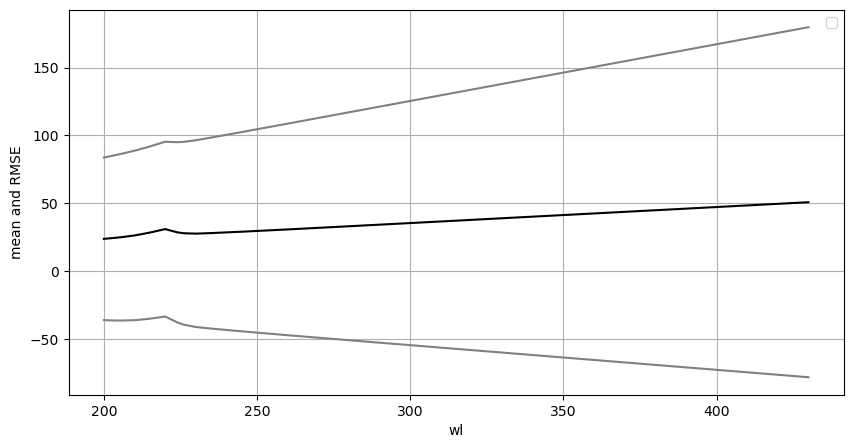

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
axes.plot(df_r['wl'], df_r['mean'], color = 'black')
axes.plot(df_r['wl'], df_r['mean_up'], color = 'grey')
axes.plot(df_r['wl'], df_r['mean_down'],  color = 'grey')
        
plt.xlabel('wl')
plt.ylabel('mean and RMSE')
plt.title('')
plt.legend()
plt.grid(True)

plt.show()

In [24]:
df_c.columns

Index(['DI_00ppth_blank_a', 'DI_00ppth_blank_b', 'DI_00ppth_blank_c',
       'per_29_NaCl_a', 'per_29_NaCl_b', 'per_29_NaCl_c', 'per_44_NaCl_a',
       'per_44_NaCl_b', 'per_44_NaCl_c', 'per_66_NaCl_a', 'per_66_NaCl_b',
       'per_66_NaCl_c', 'NaCl_86435g_a', 'NaCl_86435g_b', 'NaCl_86435g_c',
       'DI_00ppth_blank_d'],
      dtype='object')